# El dataset de MNIST

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
len(mnist.train.images)

55000

In [5]:
len(mnist.test.images)

10000

In [15]:
im_temp = mnist.train.images[1]

In [16]:
from skimage import io
import numpy as np

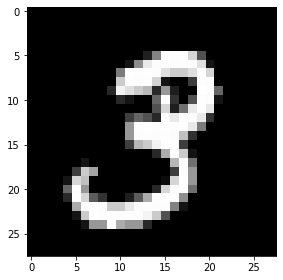

In [17]:
io.imshow(np.reshape(im_temp, (28,28)))

In [18]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

# Una red neuronal con TensorFlow - v1
* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 784.
* El dataset se puede pensar como 55000 filas y 784 columnas.
* Cada dato del dataset es un número real entre 0 y 1.

y = softmax(W * x + b)

In [21]:
dim_input = 784
n_categories = 10

In [19]:
x = tf.placeholder(tf.float32, [None, dim_input])

In [22]:
W = tf.Variable(tf.zeros([dim_input,n_categories]))
b = tf.Variable(tf.zeros([n_categories]))

In [23]:
softmax_args = tf.matmul(x,W) + b
y_hat = tf.nn.softmax(softmax_args)

# Entrenando la red neuronal
* Loss / Cost <- objetivo minimizar las pérdidas

In [24]:
from IPython.display import display, Math, Latex

In [25]:
display(Math(r"H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y_i})"))

<IPython.core.display.Math object>

In [26]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [27]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))

In [28]:
# tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)

In [30]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [31]:
sess = tf.InteractiveSession()

In [32]:
tf.global_variables_initializer().run()

In [34]:
for _ in range(50000):
    batch_x, batch_y = mnist.train.next_batch(1000)
    sess.run(train_step, feed_dict={x:batch_x, y_:batch_y})

# Evaluando la red neuronal

In [37]:
correct_predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_,1))

In [38]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [46]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})*100,"%")

92.57000088691711 %
